In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import fetch_openml

# load the MNIST dataset
mnist_data = fetch_openml('mnist_784')

In [3]:
print(mnist_data['data'].shape)
print(mnist_data['target'].shape)

X = mnist_data['data']
y = mnist_data['target']

(70000, 784)
(70000,)


In [4]:
from sklearn.model_selection import train_test_split

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


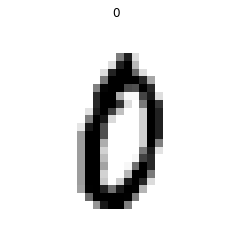

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

index = 2

# plot an example
def plot_example(X, y):
    plt.imshow(X.reshape(28, 28), cmap='binary')
    plt.axis(False)
    plt.title(f"{y}")

plot_example(X_train[index], y_train[index])
plt.show()

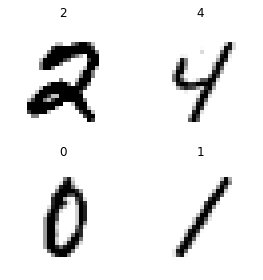

In [6]:
# plot a few examples
fig = plt.figure(figsize=(4, 4))

for i in range(4):
    fig.add_subplot(2, 2, i+1)
    plot_example(X_train[i], y_train[i])

fig.tight_layout()
plt.show()

In [7]:
import numpy as np

def one_hot_encode(x, num_classes=10):
    x_one_hot = x.astype(int).reshape(-1)
    x_one_hot = np.eye(num_classes)[x_one_hot]
    return x_one_hot

# one-hot encode labels
y_train_one_hot = one_hot_encode(y_train)
y_test_one_hot = one_hot_encode(y_test)

In [8]:
# normalize the inputs
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

In [20]:
from models import Sequential
from layers import Linear, ReLU, Softmax, Tanh

# create the model
model = Sequential()
model.add(Linear(16, input_shape=(784,)))
model.add(ReLU())
model.add(Linear(16))
model.add(Tanh())
model.add(Linear(10))
model.add(Softmax())

In [21]:
from losses import CategoricalCrossentropy
from metrics import categorical_accuracy

# prepare the model for training
model.configure(loss=CategoricalCrossentropy(),
                learning_rate=0.1,
                metrics=[categorical_accuracy])

print(model.evaluate(X_train_normalized, y_train_one_hot))

loss=2.357509 	categorical_accuracy=0.092633
(2.357509439536042, [0.09263334])


In [22]:
# train the model
model.train(X_train_normalized, y_train_one_hot, epochs=100);

Epoch 01	loss=2.280315 	categorical_accuracy=0.113117
Epoch 02	loss=2.227715 	categorical_accuracy=0.150833
Epoch 03	loss=2.171065 	categorical_accuracy=0.197250
Epoch 04	loss=2.105958 	categorical_accuracy=0.243317
Epoch 05	loss=2.037726 	categorical_accuracy=0.292983
Epoch 06	loss=1.973901 	categorical_accuracy=0.340583
Epoch 07	loss=1.915926 	categorical_accuracy=0.377600
Epoch 08	loss=1.862219 	categorical_accuracy=0.412717
Epoch 09	loss=1.811601 	categorical_accuracy=0.444050
Epoch 10	loss=1.763258 	categorical_accuracy=0.471683
Epoch 11	loss=1.716508 	categorical_accuracy=0.497067
Epoch 12	loss=1.670961 	categorical_accuracy=0.518183
Epoch 13	loss=1.626786 	categorical_accuracy=0.537567
Epoch 14	loss=1.584439 	categorical_accuracy=0.555300
Epoch 15	loss=1.544217 	categorical_accuracy=0.572500
Epoch 16	loss=1.506357 	categorical_accuracy=0.588283
Epoch 17	loss=1.470801 	categorical_accuracy=0.604133
Epoch 18	loss=1.437381 	categorical_accuracy=0.618017
Epoch 19	loss=1.405895 	cate

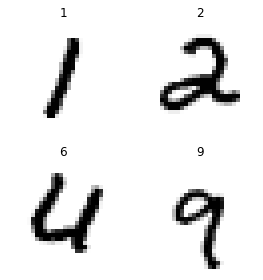

In [23]:
y_pred = np.argmax(model(X_train), axis=-1)

# plot a few predictions
fig = plt.figure(figsize=(4, 4))

for i in range(4):
    fig.add_subplot(2, 2, i+1)
    plot_example(X_train[i+100], y_pred[i+100])

fig.tight_layout()
plt.show()

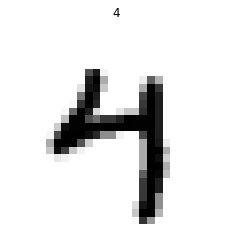

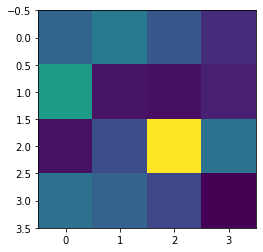

In [24]:
index = 10

plot_example(X_train[index], y_train[index])
plt.show()

# trying to visualize the activation of the first layer
A1 = model.layers[0].forward(X_train[index])
A1 = A1.reshape(4, 4)
plt.imshow(A1)
plt.show()